DEEP LEARNING WITH PYTORCH AND TENSORFLOW

In [ ]:
import pandas as pd
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
# load the training dataset (excluding rows with null values)
penguins = pd.read_csv('penguins.csv').dropna()

# Deep Learning models work best when features are on similar scales
# In a real solution, we'd implement some custom normalization for each feature, but to keep things simple
# we'll just rescale the FlipperLength and BodyMass so they're on a similar scale to the bill measurements
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

# The dataset is too small to be useful for deep learning
# So we'll oversample it to increase its size
for i in range(1,3):
    penguins = penguins.append(penguins)

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

--2023-01-29 05:57:17--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7086 (6.9K) [text/plain]
Saving to: ‘penguins.csv.1’

penguins.csv.1      100%[===================>]   6.92K  --.-KB/s    in 0s      

2023-01-29 05:57:17 (66.2 MB/s) - ‘penguins.csv.1’ saved [7086/7086]



,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
100,35.0,17.9,19.2,37.25,0
142,32.1,15.5,18.8,30.50,0
43,44.1,19.7,19.6,44.00,0
191,48.7,15.7,20.8,53.50,1
27,40.5,17.9,18.7,32.00,0
159,46.7,15.3,21.9,52.00,1
71,39.7,18.4,19.0,39.00,0
296,42.4,17.3,18.1,36.00,2
283,51.3,18.2,19.7,37.50,2
188,42.6,13.7,21.3,49.50,1


The Species column is the label our model will predict. Each label value represents a class of penguin species, encoded as 0, 1, or 2

In [ ]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 47.5 14.0 21.2 48.75 1 ] Gentoo
[ 43.2 19.0 19.7 47.75 0 ] Adelie
[ 36.2 17.3 18.7 33.0 0 ] Adelie
[ 38.6 17.0 18.8 29.0 0 ] Adelie
[ 48.5 17.5 19.1 34.0 2 ] Chinstrap
[ 49.5 19.0 20.0 38.0 2 ] Chinstrap
[ 46.8 14.3 21.5 48.5 1 ] Gentoo
[ 35.3 18.9 18.7 38.0 0 ] Adelie
[ 50.0 15.2 21.8 57.0 1 ] Gentoo
[ 42.6 13.7 21.3 49.5 1 ] Gentoo


In [ ]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'
   
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size=0.30,
                                                    random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')

Training Set: 957, Test Set: 411 

Sample of features and labels:
[51.1 16.5 22.5 52.5] 1 (Gentoo)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.5 16.2 22.9 58. ] 1 (Gentoo)
[39.3 20.6 19.  36.5] 0 (Adelie)
[42.5 20.7 19.7 45. ] 0 (Adelie)
[50.  15.3 22.  55.5] 1 (Gentoo)
[50.2  18.7  19.8  37.75] 2 (Chinstrap)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.1  14.5  21.2  46.25] 1 (Gentoo)
[43.2 16.6 18.7 29. ] 2 (Chinstrap)
[38.8  17.6  19.1  32.75] 0 (Adelie)
[37.8 17.1 18.6 33. ] 0 (Adelie)
[45.8 14.2 21.9 47. ] 1 (Gentoo)
[43.8 13.9 20.8 43. ] 1 (Gentoo)
[36.  17.1 18.7 37. ] 0 (Adelie)
[43.3 13.4 20.9 44. ] 1 (Gentoo)
[36.  18.5 18.6 31. ] 0 (Adelie)
[41.1  19.   18.2  34.25] 0 (Adelie)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[40.9 13.7 21.4 46.5] 1 (Gentoo)
[45.2 17.8 19.8 39.5] 2 (Chinstrap)
[48.4 14.6 21.3 58.5] 1 (Gentoo)
[43.6 13.9 21.7 49. ] 1 (Gentoo)
[38.5  17.9  19.   33.25] 0 (Adelie)


Install and import the PyTorch libraries


In [ ]:
!pip install torch==1.9.0+cpu torchvision==0.10.0+cpu torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.13.1+cu116
    Uninstalling torchaudio-0.13.1+cu116:
      Successfully uninstalled torchaudio-0.13.1+cu116
ERROR: pip's dependency resolver does no

In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as td

# Set random seed for reproducability
torch.manual_seed(0)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.9.0+cpu


# Prepare the data for PyTorch
PyTorch makes use of data loaders to load training and validation data in batches. We've already loaded the data into numpy arrays, but we need to wrap those in PyTorch datasets (in which the data is converted to PyTorch tensor objects) and create loaders to read batches from those datasets.

In [ ]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=20,
    shuffle=False, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=20,
    shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


Define a neural network
Now we're ready to define our neural network. In this case, we'll create a network that consists of 3 fully-connected layers:

-An input layer that receives an input value for each feature (in this case, the four penguin measurements) and applies a ReLU activation function.

-A hidden layer that receives ten inputs and applies a ReLU activation function

-An output layer that generates a non-negative numeric output for each penguin species (which a loss function will translate into classification probabilities for each of the three possible penguin species).


In [ ]:
# Number of hidden layer nodes
hl = 10

# Define the neural network
class PenguinNet(nn.Module):
    def __init__(self):
        super(PenguinNet, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        self.fc3 = nn.Linear(hl, len(penguin_classes))

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return x

# Create a model instance from the network
model = PenguinNet()
print(model)

PenguinNet(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)


# Train the model
To train the model, we need to repeatedly feed the training values forward through the network, use a loss function to calculate the loss, use an optimizer to backpropagate the weight and bias value adjustments, and validate the model using the test data we withheld.

To do this, we'll create a function to train and optimize the model, and function to test the model. Then we'll call these functions iteratively over 50 epochs, logging the loss and accuracy statistics for each epoch.

In [ ]:
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

# Specify the loss criteria (we'll use CrossEntropyLoss for multi-class classification)
loss_criteria = nn.CrossEntropyLoss()

# Use an "Adam" optimizer to adjust weights
# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 50
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1
Training set: Average loss: 1.102661
Validation set: Average loss: 0.933957, Accuracy: 189/411 (46%)

Epoch: 2
Training set: Average loss: 0.905142
Validation set: Average loss: 0.870184, Accuracy: 227/411 (55%)

Epoch: 3
Training set: Average loss: 0.863389
Validation set: Average loss: 0.830578, Accuracy: 229/411 (56%)

Epoch: 4
Training set: Average loss: 0.829038
Validation set: Average loss: 0.797620, Accuracy: 231/411 (56%)

Epoch: 5
Training set: Average loss: 0.800002
Validation set: Average loss: 0.769257, Accuracy: 242/411 (59%)

Epoch: 6
Training set: Average loss: 0.774563
Validation set: Average loss: 0.744467, Accuracy: 252/411 (61%)

Epoch: 7
Training set: Average loss: 0.752545
Validation set: Average loss: 0.722871, Accuracy: 258/411 (63%)

Epoch: 8
Training set: Average loss: 0.733695
Validation set: Average loss: 0.704833, Accuracy: 274/411 (67%)

Epoch: 9
Training set: Average loss: 0.716937
Validation set: Average loss: 0.689475, Accuracy: 285/411 (69%)

E

# Review training and validation loss
After training is complete, we can examine the loss metrics we recorded while training and validating the model. We're really looking for two things:

The loss should reduce with each epoch, showing that the model is learning the right weights and biases to predict the correct labels.
The training loss and validation loss should follow a similar trend, showing that the model is not overfitting to the training data.
Let's plot the loss metrics and see:

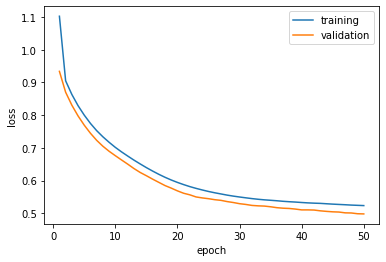

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

# View the learned weights and biases
The trained model consists of the final weights and biases that were determined by the optimizer during training. Based on our network model we should expect the following values for each layer:

Layer 1: There are four input values going to ten output nodes, so there should be 10 x 4 weights and 10 bias values.

Layer 2: There are ten input values going to ten output nodes, so there should be 10 x 10 weights and 10 bias values.

Layer 3: There are ten input values going to three output nodes, so there should be 3 x 10 weights and 3 bias values.

In [ ]:
for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].numpy())

fc1.weight 
 [[ 0.02229995 -0.35246706 -0.2752421  -0.29135275]
 [ 0.19775036 -0.6237761   0.02212173  0.08350384]
 [ 0.32231152 -0.37796003 -0.34325612 -0.29033077]
 [ 0.44929087 -0.5670486   0.33180645  0.17679961]
 [ 0.04045187  0.39468873 -0.03539526  0.0578948 ]
 [-0.11417234 -0.00351322  0.06379652 -0.39110255]
 [-0.2620657   0.40374637 -0.40577334 -0.0359031 ]
 [ 0.60263544  0.38030934 -0.06633069 -0.44905552]
 [ 0.24768895 -0.35614038 -0.14193213 -0.16775817]
 [-0.22024718  0.22054115  0.6350871   0.13495141]]
fc1.bias 
 [ 0.4478464   0.20768906 -0.31610698 -0.01876415 -0.1457353  -0.21191257
  0.14706135  0.12003304  0.37511402  0.15581867]
fc2.weight 
 [[ 5.06236858e-04  3.49151284e-01 -3.05821389e-01  2.65271723e-01
  -3.29438418e-01  4.35840944e-03 -5.37640229e-02 -4.09044147e-01
   4.17961515e-02  4.08502996e-01]
 [-9.24395546e-02 -1.87742561e-01 -1.16953306e-01 -3.13428640e-01
   1.42743304e-01 -1.51872724e-01 -2.11031526e-01 -1.82179257e-01
   1.81817070e-01  1.67465895e

## Evaluate model performance
So, is the model any good? The raw accuracy reported from the validation data would seem to indicate that it predicts pretty well; but it's typically useful to dig a little deeper and compare the predictions for each possible class. A common way to visualize the performance of a classification model is to create a confusion matrix that shows a crosstab of correct and incorrect predictions for each class.

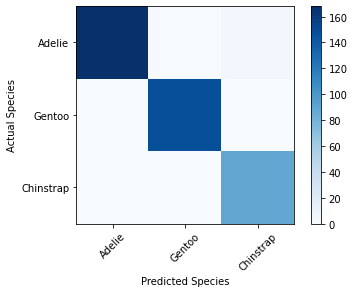

In [ ]:
#Pytorch doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
from sklearn.metrics import confusion_matrix
import numpy as np

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

The confusion matrix should show a strong diagonal line indicating that there are more correct than incorrect predictions for each class.

## Save the trained model
Now that we have a model we believe is reasonably accurate, we can save its trained weights for use later

In [ ]:
# Save the model weights
model_file = 'penguin_classifier.pt'
torch.save(model.state_dict(), model_file)
del model
print('model saved as', model_file)

model saved as penguin_classifier.pt


## Use the trained model
When we have a new penguin observation, we can use the model to predict the species

In [ ]:

# New penguin features
x_new = [[39.2,21.1,196.0,4150.0]]
print ('New sample: {}'.format(x_new))

# Create a new model class and load weights
model = PenguinNet()
model.load_state_dict(torch.load(model_file))

# Set model to evaluation mode
model.eval()

# Get a prediction for the new data sample
x = torch.Tensor(x_new).float()
_, predicted = torch.max(model(x).data, 1)

print('Prediction:',penguin_classes[predicted.item()])

New sample: [[39.2, 21.1, 196.0, 4150.0]]
Prediction: Gentoo


# Deep Learning with TensorFlow

In [ ]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 12.1 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing i

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.11.0
TensorFlow version: 2.11.0


## Prepare the data for TensorFlow
We've already loaded our data and split it into training and validation datasets. However, we need to do some further data preparation so that our data will work correctly with TensorFlow. Specifically, we need to set the data type of our features to 32-bit floating point numbers, and specify that the labels represent categorical classes rather than numeric values.

In [ ]:
# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


## Define a neural network
Now we're ready to define our neural network. In this case, we'll create a network that consists of 3 fully-connected layers:

An input layer that receives an input value for each feature (in this case, the four penguin measurements) and applies a ReLU activation function.

A hidden layer that receives ten inputs and applies a ReLU activation function.

An output layer that uses a SoftMax activation function to generate an output for each penguin species (which represent the classification probabilities for each of the three possible penguin species). Softmax functions produce a vector with probability values that sum to 1.

In [ ]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(len(penguin_classes), input_dim=hl, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


## Train the model
To train the model, we need to repeatedly feed the training values forward through the network, use a loss function to calculate the loss, use an optimizer to backpropagate the weight and bias value adjustments, and validate the model using the test data we withheld.

To do this, we'll apply an Adam optimizer to a categorical cross-entropy loss function iteratively over 50 epochs.

In [ ]:
#hyper-parameters for optimizer
learning_rate = 0.001
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50
96/96 [==============================] - 2s 9ms/step - loss: 4.7347 - accuracy: 0.3866 - val_loss: 1.0716 - val_accuracy: 0.3212
Epoch 2/50
96/96 [==============================] - 0s 3ms/step - loss: 1.0029 - accuracy: 0.6520 - val_loss: 0.9010 - val_accuracy: 0.7421
Epoch 3/50
96/96 [==============================] - 0s 3ms/step - loss: 0.8624 - accuracy: 0.5883 - val_loss: 0.8174 - val_accuracy: 0.8078
Epoch 4/50
96/96 [==============================] - 0s 3ms/step - loss: 0.7971 - accuracy: 0.6917 - val_loss: 0.8030 - val_accuracy: 0.7105
Epoch 5/50
96/96 [==============================] - 0s 3ms/step - loss: 0.7373 - accuracy: 0.8516 - val_loss: 0.7281 - val_accuracy: 0.8856
Epoch 6/50
96/96 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.8485 - val_loss: 0.6736 - val_accuracy: 0.7372
Epoch 7/50
96/96 [==============================] - 0s 3ms/step - loss: 0.6406 - accuracy: 0.8934 - val_loss: 0.6094 - val_accuracy: 0.9221
Epoch 8/50
96/96 [==

## Review training and validation loss
After training is complete, we can examine the loss metrics we recorded while training and validating the model. We're really looking for two things:

The loss should reduce with each epoch, showing that the model is learning the right weights and biases to predict the correct labels.

The training loss and validation loss should follow a similar trend, showing that the model is not overfitting to the training data.

Let's plot the loss metrics and see:

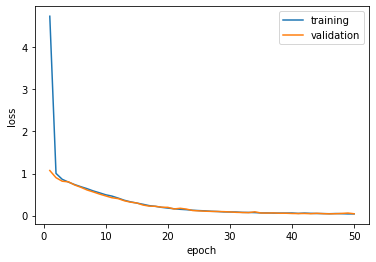

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()


## View the learned weights and biases
The trained model consists of the final weights and biases that were determined by the optimizer during training. Based on our network model we should expect the following values for each layer:

Layer 1: There are four input values going to ten output nodes, so there should be 4 x 10 weights and 10 bias values.
Layer 2: There are ten input values going to ten output nodes, so there should be 10 x 10 weights and 10 bias values.
Layer 3: There are ten input values going to three output nodes, so there should be 10 x 3 weights and 3 bias values.

In [ ]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[ 0.34819221 -0.22542676  0.14334998 -0.20979366  0.22670588  0.44623157
  -0.28841475  0.44679496 -0.36357725 -0.07718617]
 [-1.2847741   1.1874338  -0.13798    -0.4187045   0.15522899  0.90032756
   0.01894599  0.2556485  -0.03043526  0.18137999]
 [ 0.47098175 -0.05068964 -0.33816677 -0.56706834 -0.3067076  -0.36346814
  -0.60682994 -0.44267845 -0.3830216   0.36973584]
 [ 0.5962808   0.35482445  0.31327745 -0.32505646  0.3239517   0.10458663
  -0.38811812 -0.29632512  0.4024192  -0.08509042]] 
Biases:
 [-0.4929077   0.5579143  -0.30228546  0.         -0.28083572  0.08357517
  0.         -0.25139266  0.         -0.0186032 ]
------------
Weights:
 [[-0.086155   -0.11518669  0.5306053  -0.2404179  -0.33351478  0.44563007
   0.30535477 -0.02052689 -0.00245721 -0.2632157 ]
 [ 0.44838813  0.17644018 -0.42204303  0.2937833  -0.23094887  0.36441952
   0.22033644 -0.26164812 -0.06387301  0.39393783]
 [-0.08728151  0.21185625  0.39471284  0.24197084  0.09860706  0.29984

## Evaluate model performance
So, is the model any good? The raw accuracy reported from the validation data would seem to indicate that it predicts pretty well; but it's typically useful to dig a little deeper and compare the predictions for each possible class. A common way to visualize the performance of a classification model is to create a confusion matrix that shows a crosstab of correct and incorrect predictions for each class.

13/13 [==============================] - 0s 2ms/step


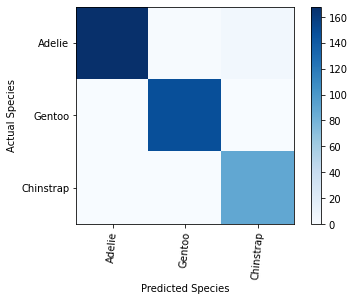

In [ ]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=85)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

Save the trained model
Now that we have a model we believe is reasonably accurate, we can save its trained weights for use later.

In [ ]:
# Save the trained model
modelFileName = 'models/penguin-classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/penguin-classifier.h5


## Use the trained model
When we have a new penguin observation, we can use the model to predict the species.

In [ ]:
# Load the saved model
model = models.load_model(modelFileName)

# CReate a new array of features
x_new = np.array([[50.4,15.3,20,50]])
print ('New sample: {}'.format(x_new))

# Use the model to predict the class
class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(penguin_classes[predictions[0]])

New sample: [[50.4 15.3 20.  50. ]]
1/1 [==============================] - 0s 232ms/step
Gentoo
